# Data for Covid-19 in China

Data source: WHO situation reports
Period examined: from 20th January 2020

So far, the data suggest that the epidemics is spreading with a polynomial growth (3rd degree) both in Italy and worldwide. 

In [1]:
#Reading the data
import pandas as pd

df = pd.read_csv("Covid-19_China_WHO_data.csv")
df["Date"] = pd.to_datetime(df['Date'], dayfirst=True)
df1 = df.iloc[0:27]
df2 = df.iloc[27:]
print(df1.head(27))
print(df2.head(20))

         Date  Total confirmed cases China
0  2020-01-21                          278
1  2020-01-22                          309
2  2020-01-23                          571
3  2020-01-24                          830
4  2020-01-25                         1297
5  2020-01-26                         1985
6  2020-01-27                         2741
7  2020-01-28                         4537
8  2020-01-29                         5997
9  2020-01-30                         7736
10 2020-01-31                         9720
11 2020-02-01                        11821
12 2020-02-02                        14411
13 2020-02-03                        17238
14 2020-02-04                        20471
15 2020-02-05                        24363
16 2020-02-06                        28060
17 2020-02-07                        31211
18 2020-02-08                        34598
19 2020-02-09                        37251
20 2020-02-10                        40235
21 2020-02-11                        42708
22 2020-02-

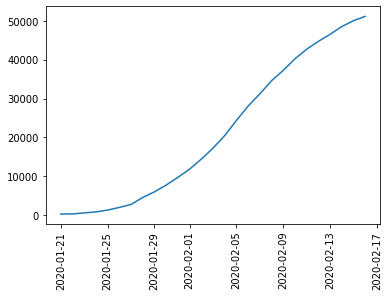

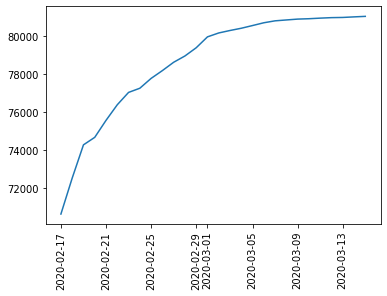

In [5]:
'''
Plotting and curve fitting for confirmed cases in China
(1: 20 Jan - 15 Feb (included); 2: 16 Feb. onwards)
'''

import matplotlib.pyplot as plt
date1 = df1["Date"]
cases_china1 = df1["Total confirmed cases China"]
plt.xticks(rotation=90)
plt.plot(date1, cases_china1)
plt.show()

date2 = df2["Date"]
cases_china2 = df2["Total confirmed cases China"]
plt.xticks(rotation=90)
plt.plot(date2, cases_china2)
plt.show()



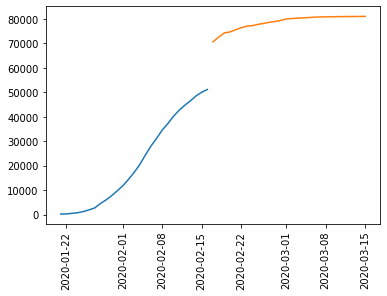

In [3]:
import matplotlib.pyplot as plt
plt.xticks(rotation=90)
plt.plot(date1, cases_china1, date2, cases_china2)
plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
[28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
[  278   309   571   830  1297  1985  2741  4537  5997  7736  9720 11821
 14411 17238 20471 24363 28060 31211 34598 37251 40235 42708 44730 46550
 48548 50054 51174]
[70635 72528 74280 74675 75569 76392 77042 77262 77780 78191 78630 78961
 79394 79968 80174 80304 80422 80565 80711 80813 80859 80904 80924 80955
 80981 80991 81021 81048]
28


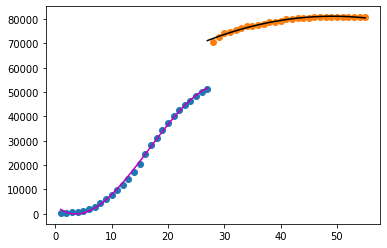

In [4]:
def create_date_conv1(date):
    days = []
    a = list(date)
    for x in range (1, len(a)+1):
        days.append(x)
    return days

def create_date_conv2(date):
    days = []
    a = list(date)
    for x in range (1, len(a)+1):
        days.append(x+27)
    return days
    
a1 = create_date_conv1(date1)
a2 = create_date_conv2(date2)

print(a1)
print(a2)

from numpy import *
import numpy as np
import pylab

# data to fit
x1 = a1
y1 = np.array(cases_china1)
print(y1)

x2 = a2
y2 = np.array(cases_china2)
print(y2)

# fit the data with a 2nd degree polynomial


z1_3 = polyfit(x1, y1, 3)
p1_3 = poly1d(z1_3)

z2_2 = polyfit(x2, y2, 2) 
p2_2 = poly1d(z2_2)

xx1 = linspace(1, len(x1))
xx2 = linspace(len(x1),len(x1)+len(x2))
print(len(x2))
pylab.plot(x1, y1, 'o',  xx1, p1_3(xx1),'-m')
pylab.plot(x2, y2, 'o', xx2, p2_2(xx2),'-k' )
#pylab.legend(['data to fit', '3rd degree polynomial', 'data to fit'])
pylab.show()
      